In [17]:
import pandas as pd
import numpy as np
import random as rand
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import re
from sklearn.model_selection import cross_val_score

In [18]:
# Reading the data
data = pd.read_csv('./final_data (1).csv')
X = data.iloc[:, 1:]
y = data['rank']
X  = X.drop(['rank'], axis=1)

#standardizing the data
X_std = StandardScaler().fit_transform(X)
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Income from Investments                                     244 non-null    float64
 1   Interest on Balance with RBI and Other Inter-Bank funds     244 non-null    float64
 2   Others                                                      244 non-null    float64
 3   Total Income                                                244 non-null    float64
 4   Payments to and Provisions for Employees                    244 non-null    float64
 5   Operating Expenses (excludes Employee Cost & Depreciation)  244 non-null    float64
 6   Total Provisions and Contingencies                          244 non-null    float64
 7   Total Expenditure                                           244 non-null    float64
 8   

In [19]:
#PCA
pca = PCA()
pca.fit(X_std)
pca_data = pca.transform(X_std)
pca_loadings_ = pca.components_.T * np.sqrt(pca.explained_variance_)

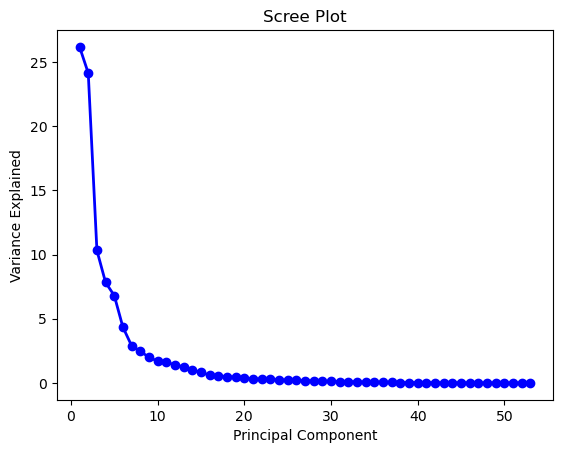

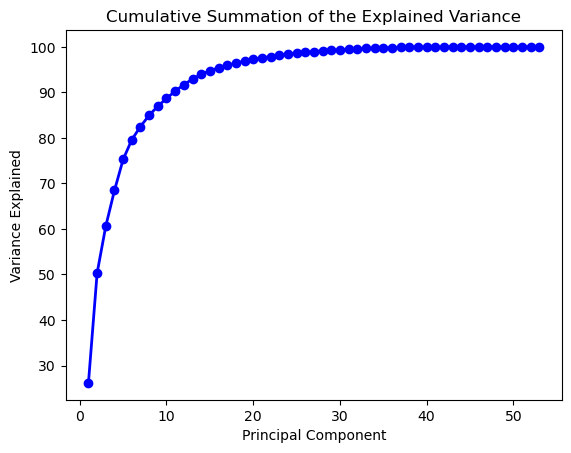

Number of components that explain 95% of the variance:  16


In [20]:
# Scree Plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_*100, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Plotting the Cumulative Summation of the Explained Variance
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_)*100, 'o-', linewidth=2, color='blue')
plt.title('Cumulative Summation of the Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# printing the number of components that explain 95% of the variance
print("Number of components that explain 95% of the variance: ", np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1)

In [21]:
n_components = 16
pca = PCA(n_components=n_components, random_state = 123)
pca.fit(X_std)

pc_loadings = pd.DataFrame(pca.components_, columns=X.columns)
pc_loadings

,Income from Investments,Interest on Balance with RBI and Other Inter-Bank funds,Others,Total Income,Payments to and Provisions for Employees,Operating Expenses (excludes Employee Cost & Depreciation),Total Provisions and Contingencies,Total Expenditure,Net Profit / Loss for The Year,Total Reserves and Surplus,...,Cost to Income (%),Interest Income/Total Assets (%),Non-Interest Income/Total Assets (%),Operating Profit/Total Assets (%),Operating Expenses/Total Assets (%),Interest Expenses/Total Assets (%),EV Per Net Sales (X),Price To Book Value (X),Price To Sales (X),Retention Ratios (%)
0,0.187883,0.152554,0.169963,0.188302,0.185500,0.146994,0.213791,0.213091,-0.172478,-0.103239,...,0.132117,-0.033715,-0.016109,-0.156096,-0.042108,0.042518,-0.053829,-0.096526,-0.106890,0.009108
1,-0.173280,-0.089159,-0.080497,-0.190718,-0.173251,-0.200517,-0.065034,-0.159317,-0.189204,-0.155706,...,0.119866,-0.067788,-0.061779,-0.154196,-0.092575,0.043753,-0.069763,-0.135586,-0.151209,0.007032
2,-0.064567,-0.078340,0.013640,-0.017903,-0.028344,0.065256,0.092102,0.002486,-0.106496,0.232494,...,0.265481,0.171487,0.288278,-0.211673,0.295407,0.016480,0.070239,0.186828,0.208918,0.009566
3,0.020714,-0.040651,0.024714,-0.024274,-0.046023,-0.019616,-0.050603,-0.024337,-0.007947,0.091951,...,-0.068898,-0.130673,-0.118619,0.037920,-0.080170,-0.041938,0.054259,-0.026150,0.036759,0.011916
4,0.070270,-0.155854,-0.123030,0.057094,-0.012401,0.052718,0.012022,0.063525,-0.037690,-0.072057,...,-0.132034,0.375984,0.127761,-0.084828,0.107418,0.458821,-0.343430,-0.053207,-0.133200,-0.005532
5,-0.036886,-0.072111,0.104287,-0.016536,-0.095868,-0.023949,0.130537,0.004326,-0.090918,0.100851,...,0.121530,-0.059273,0.129914,-0.136008,-0.156778,-0.072105,0.162844,-0.028450,0.022171,-0.048376
6,0.001841,0.106369,-0.090282,-0.021612,0.063825,0.006777,-0.045686,-0.008784,-0.120757,0.037089,...,0.092396,-0.066517,-0.270278,-0.009947,0.178503,-0.097135,0.039180,-0.028817,0.065800,0.231524
7,-0.030376,-0.135862,0.131485,-0.035157,-0.047330,0.036673,-0.010024,-0.032219,-0.004316,0.087073,...,0.069385,-0.243726,0.049939,-0.022560,0.037025,-0.232612,-0.371666,-0.432845,-0.309276,-0.343970
8,0.095775,-0.214738,-0.152427,0.031934,0.060197,0.026988,-0.062521,0.022817,-0.065312,-0.057383,...,0.018736,-0.047590,-0.223997,0.024454,0.003061,-0.011888,0.270439,0.275536,0.203509,-0.607601
9,0.053827,-0.419886,0.145684,0.007775,0.043224,0.103978,-0.053861,-0.000082,0.021423,-0.164034,...,0.081347,0.021393,-0.188461,0.093349,0.229913,-0.115472,-0.039487,0.007055,-0.060529,0.169715


In [22]:
Xpca = pca.transform(X)
Xpca = pd.DataFrame(Xpca)
Xpca 

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.260806e+08,-1.559364e+08,-6.279633e+07,1.506188e+09,3.668197e+08,9.800953e+08,5.556302e+08,-2.901271e+08,1.794060e+08,-1.624404e+08,2.190303e+08,-4.415927e+07,1.864272e+08,-6.972037e+08,8.638011e+08,4.394355e+08
1,-1.109603e+08,-1.373435e+08,-5.620856e+07,1.345453e+09,3.284002e+08,8.772710e+08,4.958916e+08,-2.600320e+08,1.596503e+08,-1.430662e+08,1.975352e+08,-3.955878e+07,1.688711e+08,-6.209913e+08,7.695143e+08,3.904221e+08
2,-9.179332e+07,-1.139899e+08,-4.577417e+07,1.134969e+09,2.796162e+08,7.406124e+08,4.199453e+08,-2.195563e+08,1.352604e+08,-1.203343e+08,1.669494e+08,-3.236427e+07,1.446085e+08,-5.237413e+08,6.491880e+08,3.282580e+08
3,-8.614188e+07,-1.069924e+08,-4.413044e+07,1.083471e+09,2.661582e+08,7.091113e+08,4.001954e+08,-2.102026e+08,1.286740e+08,-1.125063e+08,1.614007e+08,-3.217733e+07,1.408372e+08,-4.968750e+08,6.173374e+08,3.109343e+08
4,-7.565710e+07,-9.363691e+07,-4.051793e+07,9.418762e+08,2.298684e+08,6.170232e+08,3.453437e+08,-1.835663e+08,1.102418e+08,-9.662082e+07,1.415589e+08,-2.834621e+07,1.211674e+08,-4.316040e+08,5.347494e+08,2.700804e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,-7.191016e+07,-8.934450e+07,-3.340413e+07,8.574148e+08,2.135910e+08,5.553908e+08,3.189121e+08,-1.648114e+08,1.030779e+08,-9.556235e+07,1.221857e+08,-2.141750e+07,1.039547e+08,-4.021190e+08,4.951577e+08,2.526622e+08
240,-6.604258e+07,-8.223411e+07,-2.892841e+07,7.803178e+08,1.961117e+08,5.035877e+08,2.920790e+08,-1.492301e+08,9.488243e+07,-8.931439e+07,1.091141e+08,-1.805699e+07,9.313801e+07,-3.686938e+08,4.533452e+08,2.318558e+08
241,-6.523251e+07,-8.133790e+07,-2.781625e+07,7.696616e+08,1.946497e+08,4.959326e+08,2.889291e+08,-1.469966e+08,9.396210e+07,-8.905810e+07,1.068136e+08,-1.686767e+07,9.126408e+07,-3.650806e+08,4.482622e+08,2.294589e+08
242,-7.058057e+07,-8.821177e+07,-2.847155e+07,8.296922e+08,2.115845e+08,5.331014e+08,3.133222e+08,-1.577912e+08,1.023459e+08,-9.796859e+07,1.133854e+08,-1.690036e+07,9.749174e+07,-3.957905e+08,4.855996e+08,2.488299e+08


## Test-Train split 

In [35]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable with labels starting from 0

# Encode the target variable with labels starting from 0
encoder = LabelEncoder()
y = encoder.fit_transform(y)


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.2, random_state=42)

# convert the df to a numpy array
X_train = X_train.values
X_test = X_test.values

In [24]:
CV_scores = []
CV_scores_pca = []

## SVM

### SVM 

Best hyperparameters:  {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Training accuracy: 1.00
Test accuracy: 0.80
Kappa score: 0.68


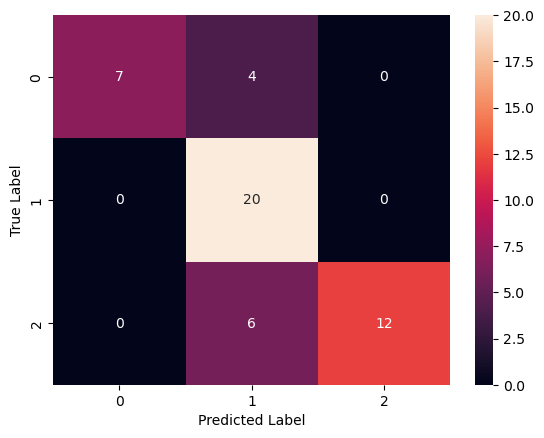

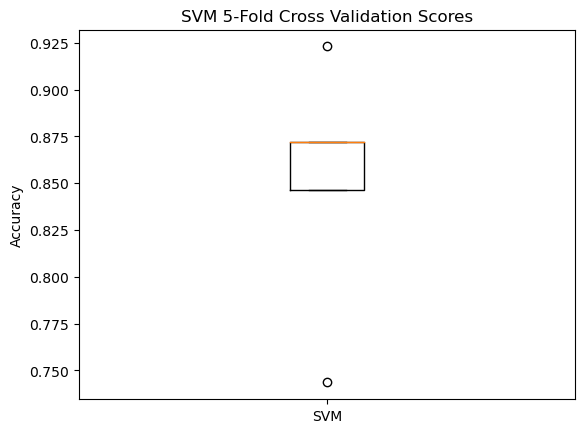

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# define the SVM classifier with rbf kernel
svm = SVC()

# define the hyperparameter grid for fine-tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['rbf']}


# perform grid search with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_SVM = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_SVM, labels=['SVM'])
plt.title('SVM 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_SVM)

## Discriminant analysis 

### Linear Disciminant analysis 

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 599, in fit
    self._solve_eigen(
  File "/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File 

Best hyperparameters:  {'solver': 'svd'}
Training accuracy: 0.61
Test accuracy: 0.43
Kappa score: 0.07


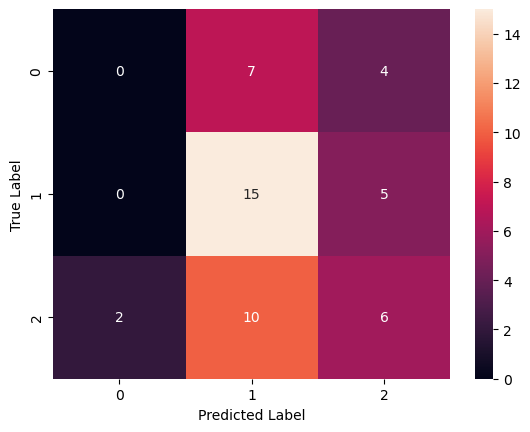

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 599, in fit
    self._solve_eigen(
  File "/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File 

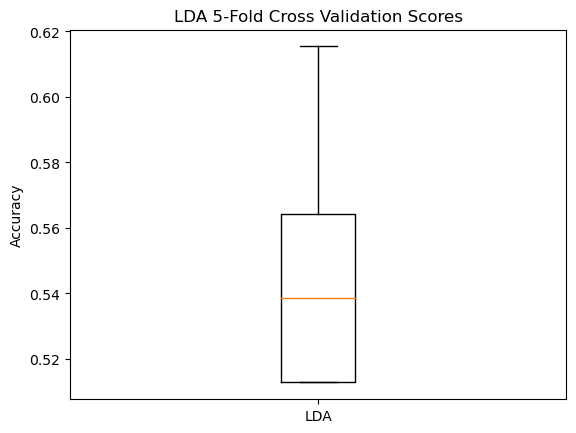

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define the LDA classifier
lda = LinearDiscriminantAnalysis()

# define the hyperparameter grid for fine-tuning
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}

# perform grid search with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_LDA = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_LDA, labels=['LDA'])
plt.title('LDA 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_LDA)

In [27]:
## LDA with PCA 

In [28]:
## quadratic Disciminant analyis 

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are coll

Best hyperparameters:  {'reg_param': 0.1}
Training accuracy: 0.88
Test accuracy: 0.59
Kappa score: 0.35


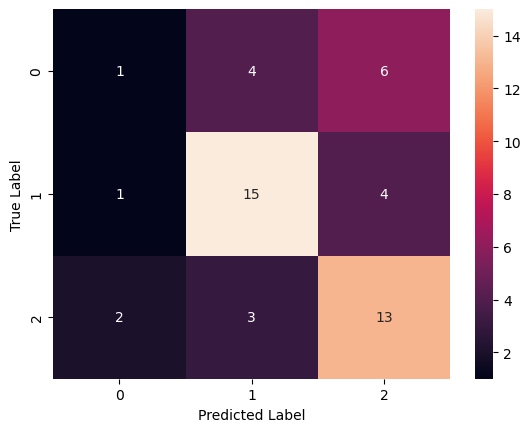

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are coll

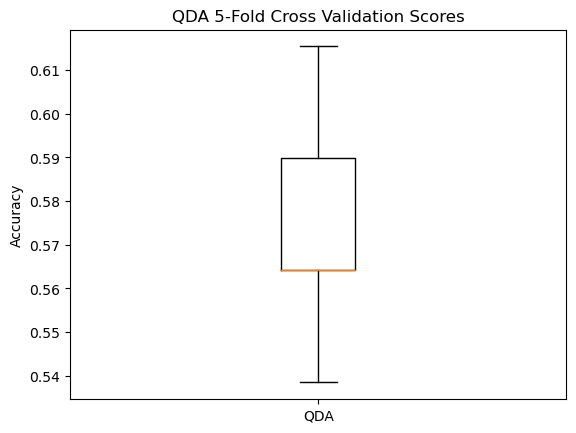

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the QDA classifier
qda = QuadraticDiscriminantAnalysis()

# define the hyperparameter grid for fine-tuning
param_grid = {'reg_param': [0.01, 0.1, 1.0, 10.0, 100.0]}

# perform grid search with 5-fold cross-validation
grid = GridSearchCV(qda, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))

# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_QDA = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_QDA, labels=['QDA'])
plt.title('QDA 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_QDA)

## Logistic Regression

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_log

Best hyperparameters:  {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Training accuracy: 0.65
Test accuracy: 0.41
Kappa score: 0.04


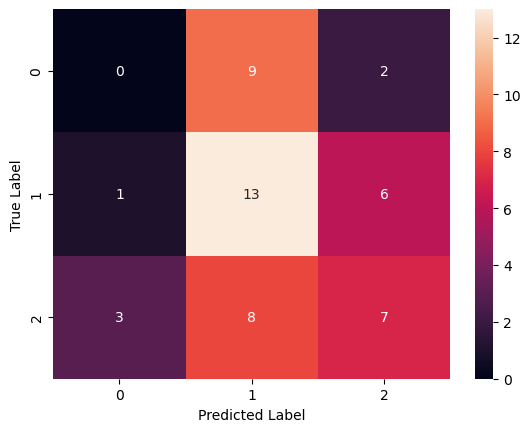

/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/locus/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_log

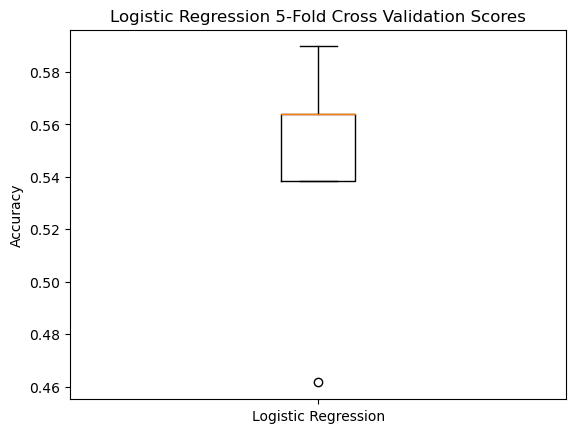

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define the logistic regression classifier
lr = LogisticRegression()

# define the hyperparameter grid for fine-tuning
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# perform grid search with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_LR = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_LR, labels=['Logistic Regression'])
plt.title('Logistic Regression 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_LR)

## decision trees 

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Training accuracy: 1.00
Test accuracy: 0.76
Kappa score: 0.62


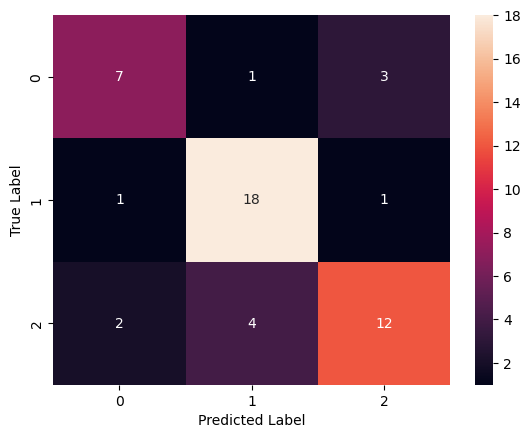

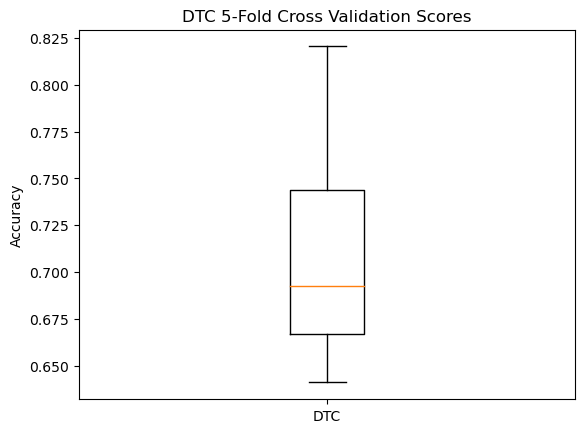

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define the decision tree classifier
dtc = DecisionTreeClassifier()

# define the hyperparameter grid for fine-tuning
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 5, 10, 20, None],
              'min_samples_split': [2, 5, 10, 20]}

# perform grid search with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_DTC = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_DTC, labels=['DTC'])
plt.title('DTC 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_DTC)

## Random Forests

Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Training accuracy: 1.00
Test accuracy: 0.71
Kappa score: 0.55


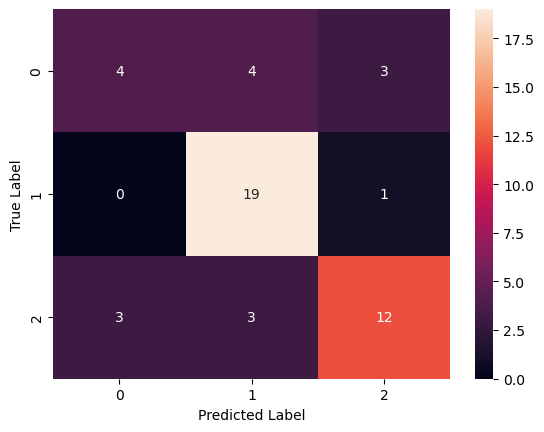

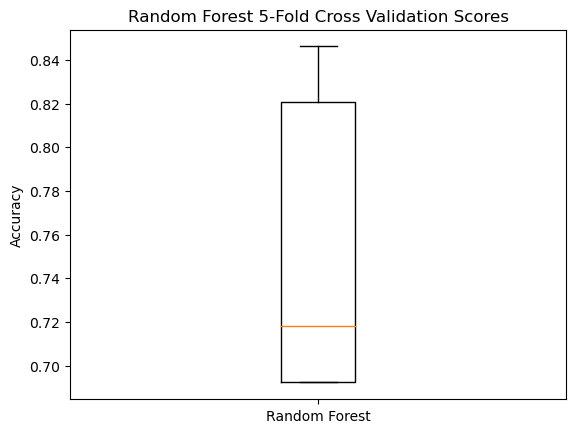

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# define the hyperparameter grid for fine-tuning
param_grid = {'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [None, 5, 10, 20],
              'max_features': ['sqrt', 'log2']}

# perform grid search with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_RF = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_RF, labels=['Random Forest'])
plt.title('Random Forest 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_RF)


# Boosting algos 

## Adaboost

Best hyperparameters:  {'learning_rate': 1.0, 'n_estimators': 200}
Training accuracy: 0.92
Test accuracy: 0.63
Kappa score: 0.40


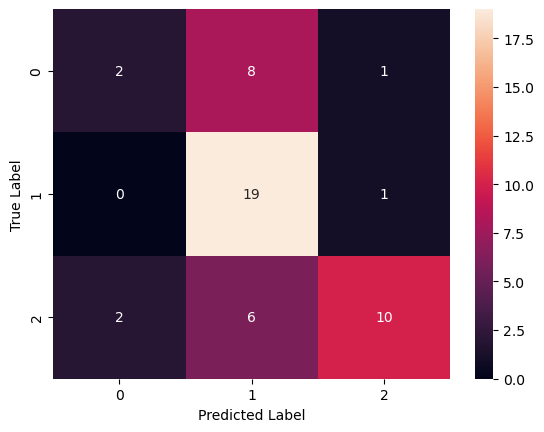

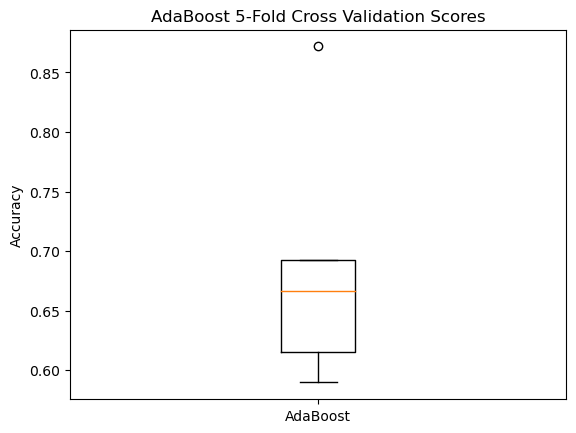

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define the base estimator for boosting
base_estimator = DecisionTreeClassifier(max_depth=1)

# define the AdaBoost classifier with the base estimator
ada = AdaBoostClassifier(base_estimator=base_estimator)

# define the hyperparameter grid for fine-tuning
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}

# perform grid search with 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# predict the labels of the test set
y_pred = grid.predict(X_test)

# calculate the accuracy and kappa score of the model on the test set
acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_AdaBoost = cross_val_score(grid, X_train, y_train, cv=5)
plt.boxplot(cv_scores_AdaBoost, labels=['AdaBoost'])
plt.title('AdaBoost 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()
CV_scores.append(cv_scores_AdaBoost)

## XGBoost

Best Hyperparameters: {'colsample_bytree': 0.7, 'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'num_class': 3, 'subsample': 0.7}
Accuracy: 0.8564102564102564
Training accuracy: 1.00
Test accuracy: 0.80
Kappa score: 0.68


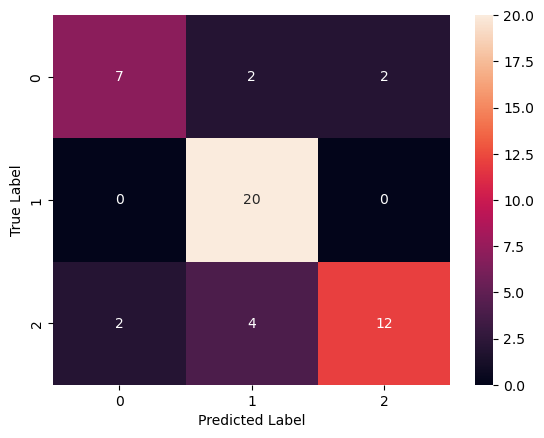

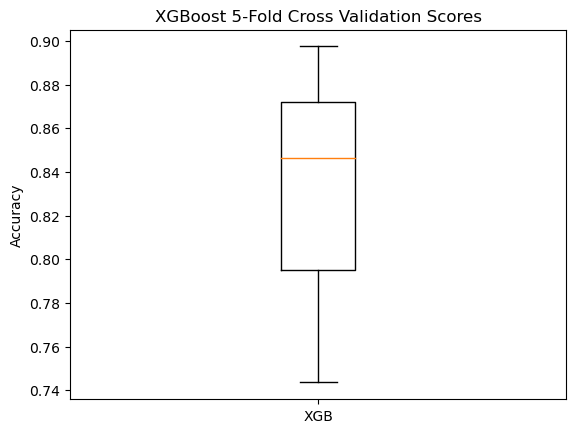

In [36]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix

# create the XGBoost classifier with default hyperparameters
model_xgboost = xgb.XGBClassifier()


# define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [4, 6],
    'n_estimators': [100, 200],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'eval_metric': ['mlogloss'],
    'num_class': [3]
}

# create the grid search object
grid_search = GridSearchCV(model_xgboost, param_grid, cv=5, scoring='accuracy')

# fit the grid search object to the training data
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)


# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

# predict the labels of the test set
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid_search.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))


# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_XGB = cross_val_score(grid_search, X_train, y_train, cv=5)
plt.boxplot(cv_scores_XGB, labels=['XGB'])
plt.title('XGBoost 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()


## Catboost 

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.0 MB/s eta 0:00:00


Best Hyperparameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Accuracy: 0.8564102564102564
Training accuracy: 1.00
Test accuracy: 0.80
Kappa score: 0.68


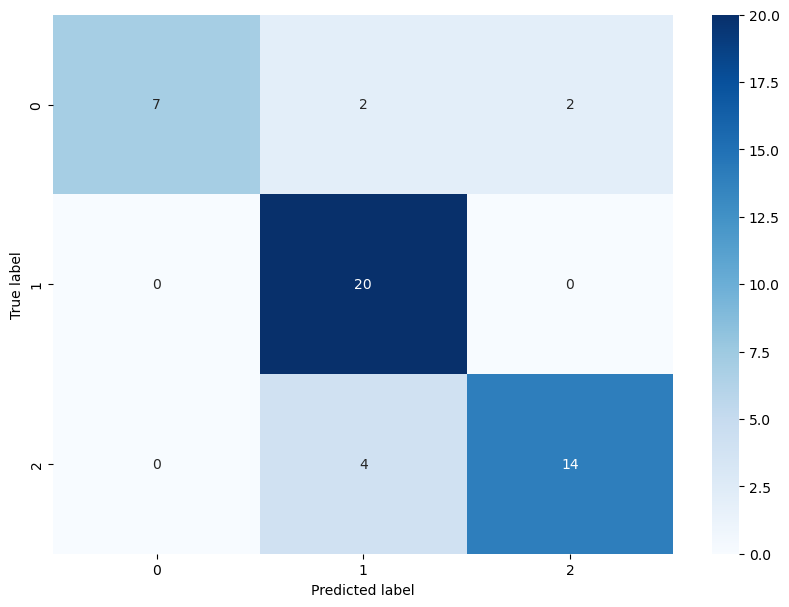

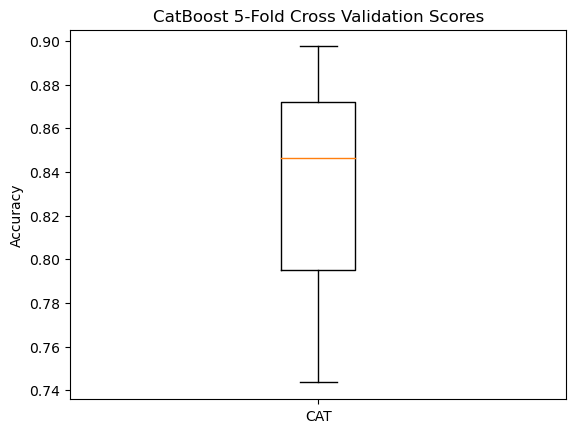

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3]
}

# Create a CatBoostClassifier object
model_catboost = CatBoostClassifier(verbose=False)

# Create a GridSearchCV object
grid_search = GridSearchCV(model_catboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid_search.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))

# Get the confusion matrix and classification report of the best model
y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# plotting the cv_scores 
cv_scores_CAT = cross_val_score(grid_search, X_test, y_test, cv=5)
plt.boxplot(cv_scores_XGB, labels=['CAT'])
plt.title('CatBoost 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()


## regularized XGBoost 

Best Hyperparameters: {'colsample_bytree': 0.7, 'eval_metric': 'mlogloss', 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200, 'num_class': 3, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'subsample': 0.7}
Accuracy: 0.8615384615384615
Training accuracy: 1.00
Test accuracy: 0.76
Kappa score: 0.62


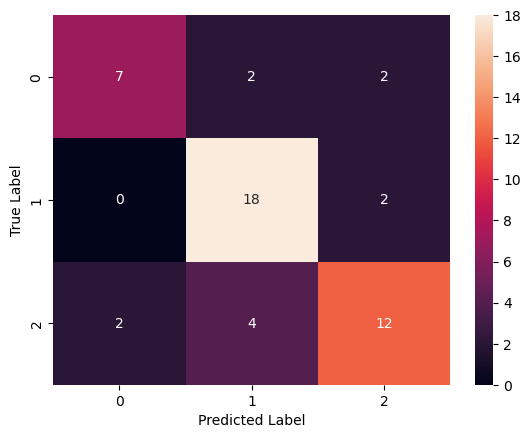

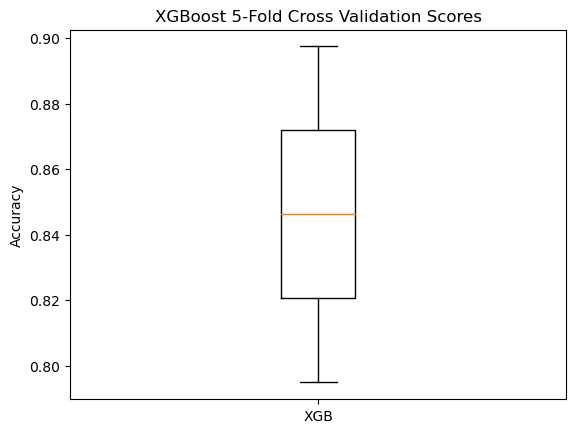

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create the XGBoost classifier with default hyperparameters
model_xgboost = xgb.XGBClassifier()


# define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [4, 6],
    'n_estimators': [100, 200],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'eval_metric': ['mlogloss'],
    'num_class': [3],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

# create the grid search object
grid_search = GridSearchCV(model_xgboost, param_grid, cv=5, scoring='accuracy')

# fit the grid search object to the training data
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)


# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

# predict the labels of the test set
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# calculate the accuracy of the model on the training set
train_acc = grid_search.score(X_train, y_train)
print("Training accuracy: {:.2f}".format(train_acc))
print("Test accuracy: {:.2f}".format(acc))
# kappa score
print("Kappa score: {:.2f}".format(kappa))


# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# plotting the cv_scores 
cv_scores_RXGB = cross_val_score(grid_search, X_train, y_train, cv=5)
plt.boxplot(cv_scores_XGB, labels=['XGB'])
plt.title('XGBoost 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()

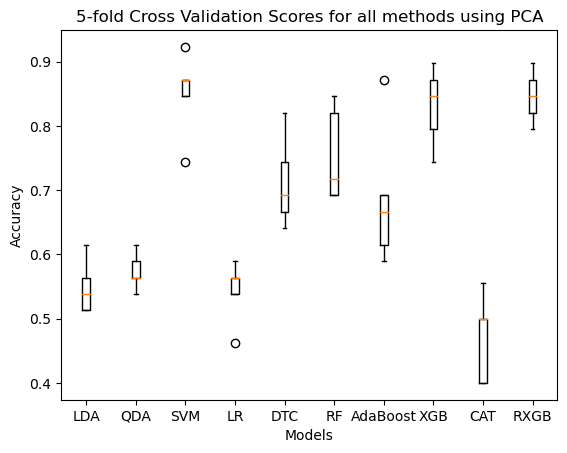

In [40]:
import matplotlib.pyplot as plt


# Create a figure and axes
fig, ax = plt.subplots()

# Create boxplots for LDA and SVM cross-validation scores
box1 = ax.boxplot(cv_scores_LDA, positions=[1], labels=['LDA'])
box2 = ax.boxplot(cv_scores_QDA, positions=[2], labels=['QDA'])
box3 = ax.boxplot(cv_scores_SVM, positions=[3], labels=['SVM'])
box4 = ax.boxplot(cv_scores_LR, positions=[4], labels=['LR'])
box5 = ax.boxplot(cv_scores_DTC, positions=[5], labels=['DTC'])
box6 = ax.boxplot(cv_scores_RF, positions=[6], labels=['RF'])
box7 = ax.boxplot(cv_scores_AdaBoost, positions=[7], labels=['AdaBoost'])
box8 = ax.boxplot(cv_scores_XGB, positions=[8], labels=['XGB'])
box9 = ax.boxplot(cv_scores_CAT, positions=[9], labels=['CAT'])
box1 = ax.boxplot(cv_scores_RXGB, positions=[10], labels=['RXGB'])


# Set plot properties
ax.set_title("5-fold Cross Validation Scores for all methods using PCA")
ax.set_ylabel('Accuracy')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlabel('Models')
# make it blue color
# plt.setp(box1['boxes'], color='blue')

# # Add legend
# plt.legend([box1['boxes'][0], box2['boxes'][0]], ['LDA', 'SVM'], loc='upper right')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data for LDA and SVM cross-validation scores
cv_scores_LDA = [0.82, 0.87, 0.86, 0.88, 0.84]
cv_scores_SVM = [0.81, 0.83, 0.86, 0.88, 0.85]

# Create a figure and axes
fig, ax = plt.subplots()

# Create boxplots for LDA and SVM cross-validation scores
box1 = ax.boxplot(cv_scores_LDA, positions=[1], labels=['LDA'])
box2 = ax.boxplot(cv_scores_SVM, positions=[2], labels=['SVM'])

# Set plot properties
ax.set_title('LDA vs. SVM 5-Fold Cross Validation Scores')
ax.set_ylabel('Accuracy')
ax.set_xticks([1, 2])
# make it blue colored
plt.setp(box1['boxes'], color='blue')

# Add legend
plt.legend([box1['boxes'][0], box2['boxes'][0]], ['LDA', 'SVM'], loc='upper right')

# Show the plot
plt.show()


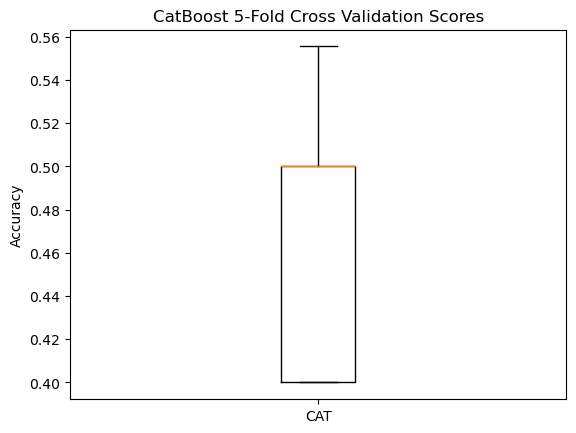

In [39]:
# plotting the cv_scores 
# cv_scores_CAT = cross_val_score(grid_search, X_test, y_test, cv=5)
plt.boxplot(cv_scores_CAT, labels=['CAT'])
plt.title('CatBoost 5-Fold Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()